In [1]:
# !pip install seaborn

## Import Libraries

In [2]:
import os

# 데이터 분석 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

## Define the Path of the data

In [3]:
IMAGE_PATH = "../input/data"
TRAIN_IMAGE_PATH = os.path.join(IMAGE_PATH, 'train/images')
EVAL_IMAGE_PATH = os.path.join(IMAGE_PATH, 'eval/images')
# print(TRAIN_IMAGE_PATH, EVAL_IMAGE_PATH)

## Create an array that shows label for each data's path
if 특정단어 in string - https://anweh.tistory.com/15


In [4]:
def find_label(path, image):
    label = -1
    personID, gender, _, age = path.split('/')[-1].split('_')
    
    ## label 'not wear' - 12 ~ 17
    if 'normal' in image:
        if gender == "male":
            if int(age) < 30:   label = 12
            elif int(age) < 60: label = 13
            else:          label = 14
        else:
            if int(age) < 30:   label = 15
            elif int(age) < 60: label = 16
            else:          label = 17
            
    ## label 'incorrect' - 6 ~ 11
    elif 'incorrect' in image:
        if gender == "male":
            if int(age) < 30:   label = 6
            elif int(age) < 60: label = 7
            else:          label = 8
        else:
            if int(age) < 30:   label = 9
            elif int(age) < 60: label = 10
            else:          label = 11
        
    ## label 'wear' - 0 ~ 5
    else:
        if gender == "male":
            if int(age) < 30:   label = 0
            elif int(age) < 60: label = 1
            else:          label = 2
        else:
            if int(age) < 30:   label = 3
            elif int(age) < 60: label = 4
            else:          label = 5
    
    ## check whether the data has been properly inserted
    # print(label, image, gender, age)

    return label

In [ ]:
individual_path = []
tmp = []

count = 0
for path in os.walk(TRAIN_IMAGE_PATH):     
    ## current path
    img_path = path[0]  

    if img_path.split('/')[-1] == "images":
        continue
    
    ## name of files inside the current path
    inner_path = os.listdir(img_path)
    
#     print("img_path:", img_path)     ## check img_path
#     print("inner_path:", inner_path) ## check inner_path
        
    for image in inner_path:
        if image[0] != '.':
            final_path = os.path.join(img_path, image)
#             tmp.append(image)
#             print("final_path:",final_path)
            label = find_label(img_path, image)
            column = {'img_path':final_path, 'label': label}
            individual_path.append(column)
    
    # break

## To check all the possible labels
# print(sorted(list(set(tmp))))

## Check Data
# individual_path[:5]

In [14]:
## individual_path is dictionary. make it to dataframe so we can use it

traindataset = pd.DataFrame(individual_path)
traindataset = traindataset.sort_values(['label','img_path'])
traindataset = traindataset.reset_index(drop=True)    

## check whether the data has transformed into DataFrame
print(traindataset.sample(5))

                                                img_path  label
16210  ../input/data/train/images/001025_male_Asian_1...     12
9333   ../input/data/train/images/000299_female_Asian...      4
11772  ../input/data/train/images/003845_female_Asian...      4
10760  ../input/data/train/images/001614_female_Asian...      4
9844   ../input/data/train/images/000643_female_Asian...      4


## Save the traindataset in .csv
save in csv - https://hleecaster.com/python-pandas-creating-and-loading-dataframes/

In [16]:
traindataset.to_csv('train_data.csv')

## informations about the data

In [7]:
traindataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18900 entries, 0 to 18899
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_path  18900 non-null  object
 1   label     18900 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 295.4+ KB


In [8]:
traindataset.count()

img_path    18900
label       18900
dtype: int64

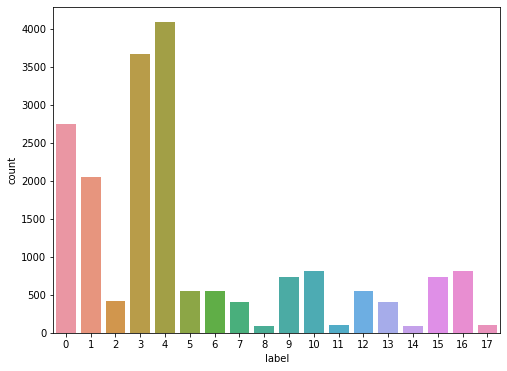

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x='label', data=traindataset)
plt.show()

## See image and the characteristics of image
image show - https://wikidocs.net/153080   
random number - http://pythonstudy.xyz/python/article/509-%EB%82%9C%EC%88%98-random

../input/data/train/images/003246_female_Asian_19/mask2.jpg
JPEG
(384, 512)
RGB


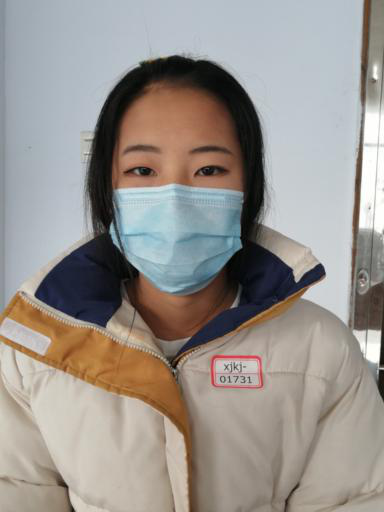

In [28]:
from random import *

i = randint(1,len(traindataset))
img = Image.open(traindataset['img_path'][i])
print(img.filename)
print(img.format)
print(img.size)
print(img.mode)
img